In [2]:


import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import os
from pathlib import Path

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 4.6 MB/s eta 0:00:0000:0100:01
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 4.6 MB/s eta 0:00:0000:0100:01
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 4.9 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 4.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 5.1 MB/s eta 0:00:00a 0:00:01
ERR

In [3]:
from pathlib import Path
import pandas as pd

# 确认正确的路径
dataset_path = Path("/media/liulianhang/C20EE8FD0EE8EB7D/h-and-m-personalized-fashion-recommendations")

# 读取数据
articles = pd.read_csv(dataset_path / "articles.csv")
customers = pd.read_csv(dataset_path / "customers.csv")
transactions = pd.read_csv(dataset_path / "transactions_train.csv")

# 打印一些数据以确认读取成功
print(articles.head())
print(customers.head())
print(transactions.head())


   article_id  product_code          prod_name  product_type_no  \
0   108775015        108775          Strap top              253   
1   108775044        108775          Strap top              253   
2   108775051        108775      Strap top (1)              253   
3   110065001        110065  OP T-shirt (Idro)              306   
4   110065002        110065  OP T-shirt (Idro)              306   

  product_type_name  product_group_name  graphical_appearance_no  \
0          Vest top  Garment Upper body                  1010016   
1          Vest top  Garment Upper body                  1010016   
2          Vest top  Garment Upper body                  1010017   
3               Bra           Underwear                  1010016   
4               Bra           Underwear                  1010016   

  graphical_appearance_name  colour_group_code colour_group_name  ...  \
0                     Solid                  9             Black  ...   
1                     Solid               

# Articles

### This table contains all h&m articles with details such as a type of product, a color, a product group and other features.  
**Article data description:**

- `article_id` : A unique identifier of every article.
- `product_code`, `prod_name` : A unique identifier of every product and its name (not the same).
- `product_type`, `product_type_name` : The group of product_code and its name.
- `product_type_name` : Product Group. Father to product type.
- `graphical_appearance_no`, `graphical_appearance_name` : The group of graphics and its name.
- `colour_group_code`, `colour_group_name` : The group of color and its name.
- `perceived_colour_value_id`, `perceived_colour_value_name`, `perceived_colour_master_id`, `perceived_colour_master_name` : The added color info.
- `department_no`, `department_name` : A unique identifier of every department and its name.
- `index_code`, `index_name` : A unique identifier of every index and its name.
- `index_group_no`, `index_group_name` : A group of indices and its name.
- `section_no`, `section_name` : A unique identifier of every section and its name.
- `garment_group_no`, `garment_group_name` : A unique identifier of every garment and its name.
- `detail_desc` : Details.

In [4]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [5]:
for col in articles.columns:
    if not 'no' in col and not 'code' in col and not 'id' in col:
        un_n = articles[col].nunique()
        print(f'n of unique {col}: {un_n}')

n of unique prod_name: 45875
n of unique product_type_name: 131
n of unique product_group_name: 19
n of unique graphical_appearance_name: 30
n of unique colour_group_name: 50
n of unique perceived_colour_value_name: 8
n of unique perceived_colour_master_name: 20
n of unique department_name: 250
n of unique index_name: 10
n of unique index_group_name: 5
n of unique section_name: 56
n of unique garment_group_name: 21
n of unique detail_desc: 43404


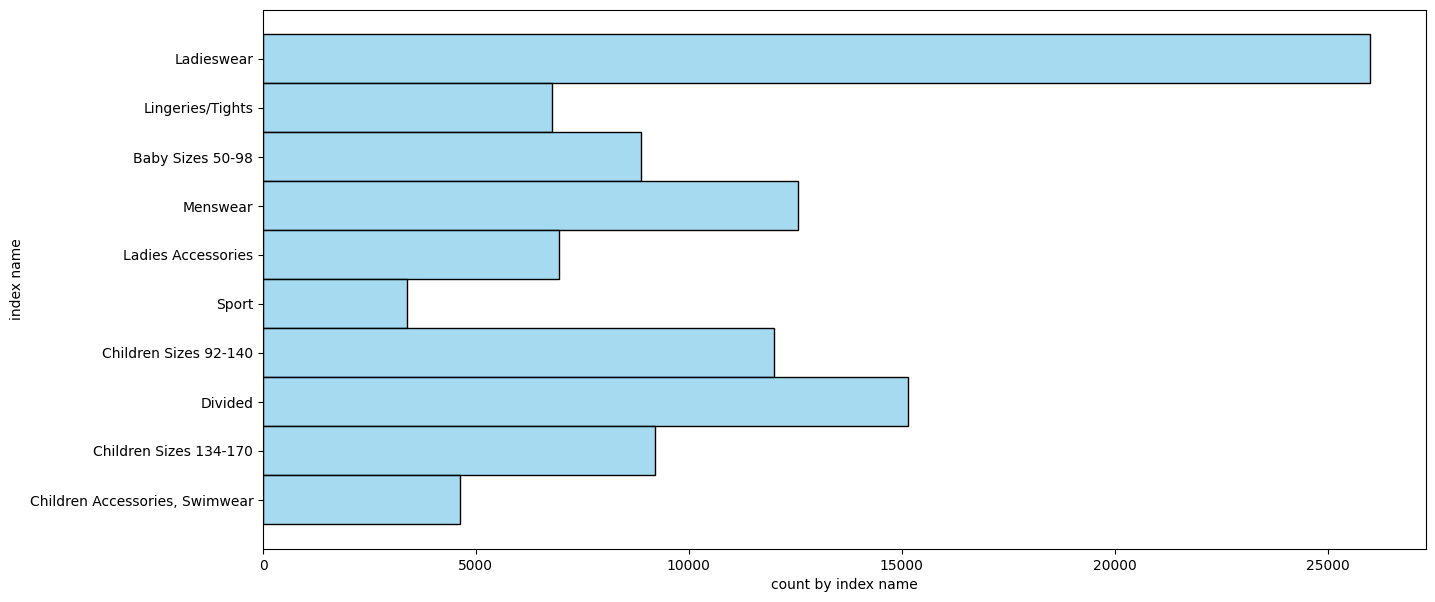

In [6]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='index_name', color='skyblue', ax=ax)
ax.set_xlabel('count by index name')
ax.set_ylabel('index name')
plt.show()

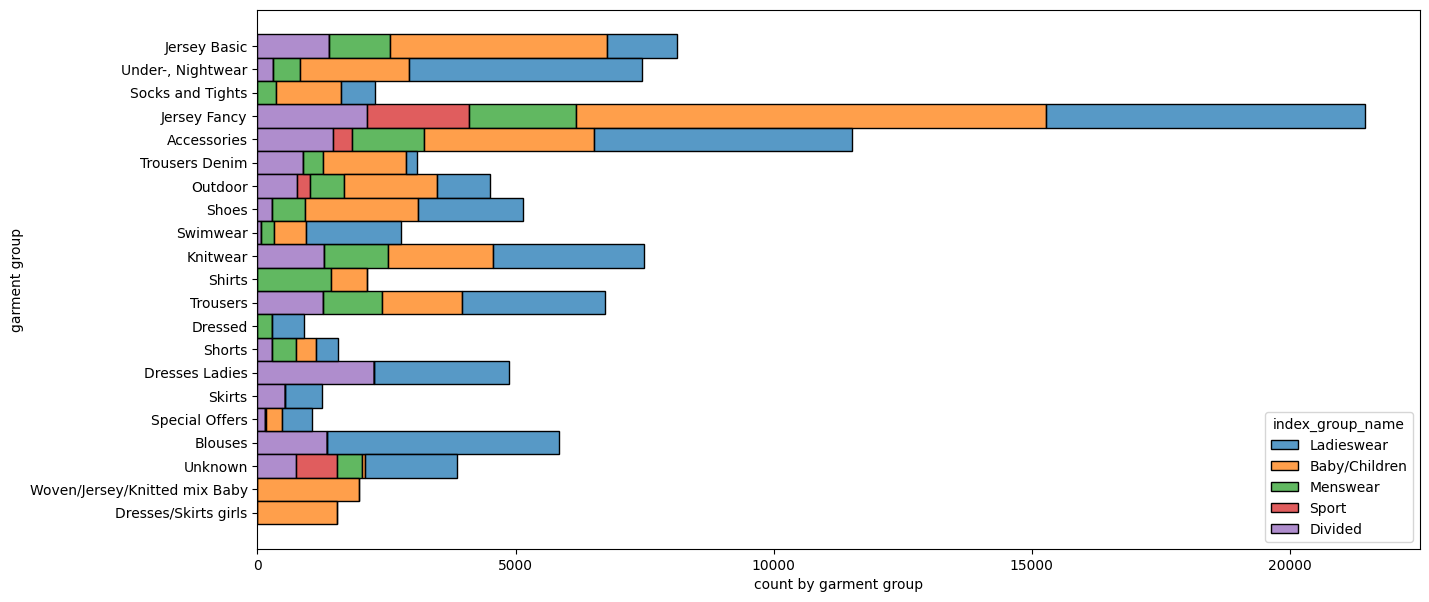

In [7]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='garment_group_name', color='orange', hue='index_group_name', multiple="stack")
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

In [8]:
articles.groupby(['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

In [8]:
pd.options.display.max_rows = None
articles.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1280
                       Beanie                         56
                       Belt                          458
                       Bracelet                      180
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    573
                       Dog Wear                       20
                       Earring                      1159
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox          

# Using CLIP to read first image and make prediction on product group

In [21]:

import torch
import clip
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# organizing all product_group_name in a list
print("product group names\n")
#show the article_id and product_group_name
#print(articles[['article_id','product_group_name']])
#show the contains of key in articles
print(articles.keys())


product_group_name = articles['product_group_name'].unique()
#show the lenth of product_group_name
print(len(product_group_name))
par_file_path='/media/liulianhang/C20EE8FD0EE8EB7D/h-and-m-personalized-fashion-recommendations'
image_path = str(par_file_path)+"/images/010/0108775015.jpg"
image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)


text = torch.cat([clip.tokenize(f"a photo of a {c}") for c in product_group_name]).to(device)
#show the text
print(text.shape)
with torch.no_grad():
    image_features = model.encode_image(image)
    print(image_features.shape)
    text_features = model.encode_text(text)
    print(text_features.shape)
    logits_per_image, logits_per_text = model(image, text)
    print(logits_per_image.shape, logits_per_text.shape)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()
    print(probs.shape)

#print("Label probs:", probs)
#print("Label probs shape:", probs.shape)

# Pick the top 5 most similar labels for the image
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(5)

# Print the result
print("\nTop predictions of product_group_name:\n")
for value, index in zip(values, indices):
    print(f"{product_group_name[index]:}: {100 * value.item():.2f}%")


product group names

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')
19
torch.Size([19, 77])
torch.Size([1, 512])
torch.Size([19, 512])
torch.Size([1, 19]) torch.Size([19, 1])
(1, 19)

Top predictions of product_group_name:

Garment Upper body: 45.56%
Nightwear: 18.92%
Garment Lower body: 10.37%
Garment Full body: 9.65%
Underwear/nightwear: 9.12%


In [10]:
# Device setup
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Image preprocessing
par_file_path='/media/liulianhang/C20EE8FD0EE8EB7D/h-and-m-personalized-fashion-recommendations'
image_path = str(par_file_path) + "/images/010/0108775015.jpg"
image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)

# Function to predict top labels for a given category (e.g., product_group_name or product_type_name)
def predict_labels(label_list, label_type):
    print(f"\nPredicting for {label_type}\n")
    
    # Tokenize all labels in the list
    text = torch.cat([clip.tokenize(f"a photo of a {label}") for label in label_list]).to(device)
    
    # Perform prediction
    with torch.no_grad():
        # Encode image and text features
        image_features = model.encode_image(image)
        text_features = model.encode_text(text)
    
    # Normalize features
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    
    # Compute similarity between image and text
    similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
    
    # Pick the top 5 most similar labels
    values, indices = similarity[0].topk(5)
    
    # Print the top predictions
    print(f"\nTop predictions for {label_type}:\n")
    for value, index in zip(values, indices):
        print(f"{label_list[index]}: {100 * value.item():.2f}%")

# Organizing classes in their own lists
product_type_name = articles['product_type_name'].unique()
product_group_name = articles['product_group_name'].unique()
graphical_appearance_name = articles['graphical_appearance_name'].unique()
colour_group_name = articles['colour_group_name'].unique()
perceived_colour_value_name = articles['perceived_colour_value_name'].unique()
perceived_colour_master_name = articles['perceived_colour_master_name'].unique()
department_name = articles['department_name'].unique()
index_name = articles['index_name'].unique()
index_group_name = articles['index_group_name'].unique()
section_name = articles['section_name'].unique()
garment_group_name = articles['garment_group_name'].unique()

# Make separate predictions for all the classes, using loop
for label_list, label_type in zip([product_group_name, product_type_name, graphical_appearance_name, colour_group_name, perceived_colour_value_name, perceived_colour_master_name, department_name, index_name, index_group_name, section_name, garment_group_name], 
                                  ["product_group_name", "product_type_name", "graphical_appearance_name", "colour_group_name", "perceived_colour_value_name", "perceived_colour_master_name", "department_name", "index_name", "index_group_name", "section_name", "garment_group_name"]):
    predict_labels(label_list, label_type)


Predicting for product_group_name


Top predictions for product_group_name:

Garment Upper body: 45.56%
Nightwear: 18.92%
Garment Lower body: 10.37%
Garment Full body: 9.65%
Underwear/nightwear: 9.12%

Predicting for product_type_name


Top predictions for product_type_name:

Vest top: 83.78%
Swimwear top: 4.19%
Jumpsuit/Playsuit: 3.13%
Bodysuit: 2.83%
Pyjama jumpsuit/playsuit: 1.46%

Predicting for graphical_appearance_name


Top predictions for graphical_appearance_name:

Chambray: 18.69%
Other pattern: 14.09%
Slub: 13.27%
Melange: 11.10%
Colour blocking: 7.15%

Predicting for colour_group_name


Top predictions for colour_group_name:

Dark Green: 19.54%
Black: 17.03%
Dark Blue: 9.96%
Dark Grey: 9.50%
Dark Beige: 6.33%

Predicting for perceived_colour_value_name


Top predictions for perceived_colour_value_name:

Dark: 41.58%
Medium: 34.25%
Medium Dusty: 10.87%
Bright: 8.15%
Undefined: 3.84%

Predicting for perceived_colour_master_name


Top predictions for perceived_colour_master_n

In [39]:
#Loop in all the images folders, choose the first three images in each folder, Make separate predictions for all the classes, using loop,and calculate the accuracy
image_folder_root = "/media/liulianhang/C20EE8FD0EE8EB7D/h-and-m-personalized-fashion-recommendations/images"
image_folder_3num = os.listdir(image_folder_root)
print(len(image_folder_3num))
image_path_pool = []
#in each image folder, choose the first three images
for image_folder in image_folder_3num:
    image_folder_path = os.path.join(image_folder_root, image_folder)
    image_folder_images = os.listdir(image_folder_path)
    image_folder_images = image_folder_images[:2]
    for image_name in image_folder_images:
        image_path = os.path.join(image_folder_path, image_name)
        image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
        image_path_pool.append(image_path)


#calculate the accuracy for each lable class
def calculate_accuracy(label_list, label_type, image_path_pool):
    print(f"\nPredicting for {label_type}\n")
    correct = 0
    total = 0
    for image_path in image_path_pool:
        image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
        text = torch.cat([clip.tokenize(f"a photo of a {label}") for label in label_list]).to(device)
        with torch.no_grad():
            image_features = model.encode_image(image)
            text_features = model.encode_text(text)
        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features /= text_features.norm(dim=-1, keepdim=True)
        similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
        values, indices = similarity[0].topk(5)
        article_id = image_path.split('/')[-1].split('.')[0]
        #cut the first 1 character of the product_code
        article_id = article_id[1:]
        #use article_id to get the label type
        label = articles[articles['article_id'] == int(article_id)][label_type].values[0]
        if label_list[indices[0]] == label:
            correct += 1
        total += 1
    print(f"Accuracy for {label_type}: {correct/total*100:.2f}%")
    return correct/total*100

# Make separate predictions for all the classes, using loop
accuracy_list = []
for label_list, label_type in zip([product_group_name, product_type_name, graphical_appearance_name, colour_group_name, perceived_colour_value_name, perceived_colour_master_name, department_name, index_name, index_group_name, section_name, garment_group_name], 
                                  ["product_group_name", "product_type_name", "graphical_appearance_name", "colour_group_name", "perceived_colour_value_name", "perceived_colour_master_name", "department_name", "index_name", "index_group_name", "section_name", "garment_group_name"]):
    accuracy = calculate_accuracy(label_list, label_type, image_path_pool)
    accuracy_list.append(accuracy)

86

Predicting for product_group_name

Accuracy for product_group_name: 49.71%

Predicting for product_type_name

Accuracy for product_type_name: 44.44%

Predicting for graphical_appearance_name

Accuracy for graphical_appearance_name: 6.43%

Predicting for colour_group_name

Accuracy for colour_group_name: 29.24%

Predicting for perceived_colour_value_name

Accuracy for perceived_colour_value_name: 14.04%

Predicting for perceived_colour_master_name

Accuracy for perceived_colour_master_name: 65.50%

Predicting for department_name

Accuracy for department_name: 14.62%

Predicting for index_name

Accuracy for index_name: 32.16%

Predicting for index_group_name

Accuracy for index_group_name: 45.03%

Predicting for section_name

Accuracy for section_name: 18.13%

Predicting for garment_group_name

Accuracy for garment_group_name: 47.37%
